In [1]:
import re
import sys
import subprocess
import matplotlib.pyplot as plt

In [2]:
mathtext_demos = {
    "Header demo":
        r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = "
        r"U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} "
        r"\int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ "
        r"U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_"
        r"{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$",

    "Subscripts and superscripts":
        r"$\alpha_i > \beta_i,\ "
        r"\alpha_{i+1}^j = {\rm sin}(2\pi f_j t_i) e^{-5 t_i/\tau},\ "
        r"\ldots$",

    "Fractions, binomials and stacked numbers":
        r"$\frac{3}{4},\ \binom{3}{4},\ \genfrac{}{}{0}{}{3}{4},\ "
        r"\left(\frac{5 - \frac{1}{x}}{4}\right),\ \ldots$",

    "Radicals":
        r"$\sqrt{2},\ \sqrt[3]{x},\ \ldots$",

    "Fonts":
        r"$\mathrm{Roman}\ , \ \mathit{Italic}\ , \ \mathtt{Typewriter} \ "
        r"\mathrm{or}\ \mathcal{CALLIGRAPHY}$",

    "Accents":
        r"$\acute a,\ \bar a,\ \breve a,\ \dot a,\ \ddot a, \ \grave a, \ "
        r"\hat a,\ \tilde a,\ \vec a,\ \widehat{xyz},\ \widetilde{xyz},\ "
        r"\ldots$",

    "Greek, Hebrew":
        r"$\alpha,\ \beta,\ \chi,\ \delta,\ \lambda,\ \mu,\ "
        r"\Delta,\ \Gamma,\ \Omega,\ \Phi,\ \Pi,\ \Upsilon,\ \nabla,\ "
        r"\aleph,\ \beth,\ \daleth,\ \gimel,\ \ldots$",

    "Delimiters, functions and Symbols":
        r"$\coprod,\ \int,\ \oint,\ \prod,\ \sum,\ "
        r"\log,\ \sin,\ \approx,\ \oplus,\ \star,\ \varpropto,\ "
        r"\infty,\ \partial,\ \Re,\ \leftrightsquigarrow, \ \ldots$",
}

In [3]:
n_lines = len(mathtext_demos)

In [4]:
def action():
    # colors used in Matplotlib online documentation
    mpl_grey_rgb = (51 / 255, 51 / 255, 51 / 255)
    
    # creating figure and axis
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_axes([0.01, 0.01, 0.98, 0.90], facecolor="white", frameon=True)
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(
        "Matplotlib's math rendering engine", color=mpl_grey_rgb,
        fontsize=14, weight="bold",
    )
    ax.set_xticks([])
    ax.set_yticks([])
    
    # gap between lines in axes coords
    line_axesfrac = 1 / n_lines
    
    # plot header demonstration formula
    full_demo = mathtext_demos["Header demo"]
    ax.annotate(
        full_demo, xy=(0.5, 1.0 - 0.59 * line_axesfrac),
        color="tab:orange", ha="center", fontsize=20,
    )
    
    # plot feature demonstration formulae
    for i_line, (title, demo) in enumerate(mathtext_demos.items()):
        if i_line == 0:
            continue
        
        baseline = 1 - i_line * line_axesfrac
        baseline_next = baseline - line_axesfrac
        fill_color = ["white", "tab:blue"][i_line % 2]
        ax.axhspan(baseline, baseline_next, color=fill_color, alpha=0.2)
        ax.annotate(
            f"{title}:", xy=(0.06, baseline - 0.3 * line_axesfrac),
            color=mpl_grey_rgb, weight="bold",
        )
        ax.annotate(
            demo, xy=(0.04, baseline - 0.75 * line_axesfrac),
            color=mpl_grey_rgb, fontsize=16,
        )
    
    plt.show()

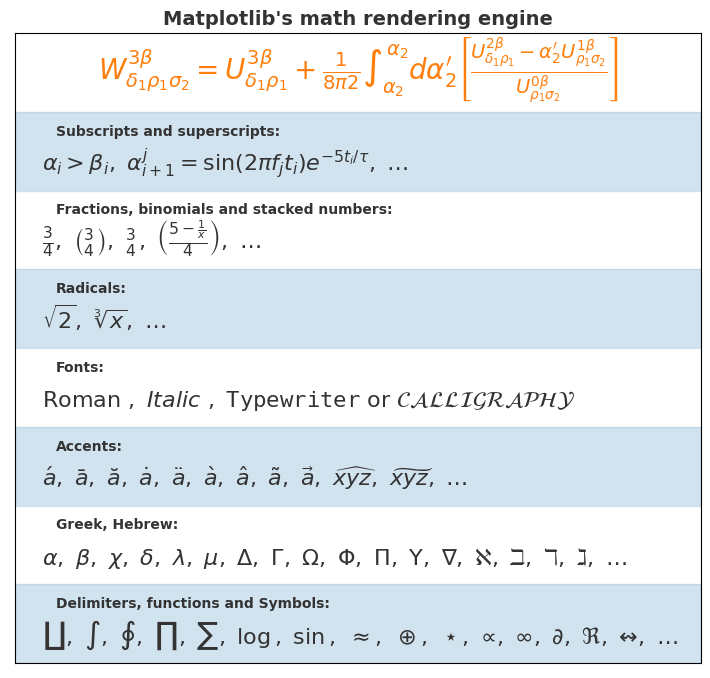

In [5]:
if "--latex" in sys.argv:
    with open("mathtext_examples.ltx", "w") as writer:
        writer.write("\\documentclass{article}\n")
        writer.write("\\usepackage{amsmath, amssymb}\n")
        writer.write("\\begin{document}\n")
        writer.write("\\begin{enumerate}\n")
        
        for s in mathtext_demos.values():
            s = re.sub(r"(?<!\\)\$", "$$", s)
            writer.write(f"\\item {s}\n")
        
        writer.write("\\end{enumerate}\n")
        writer.write("\\end{document}\n")
    
    subprocess.call(["pdflatex", "mathtext_examples.ltx"])
else:
    action()